In [1]:
import numpy as np
import torch
from graph_traffic.train_gnn import test_model, predict
import matplotlib.pyplot as plt

training_datetime = "20220610_014637"

model, test_loader, norm_layer, batch_size, graph = test_model(training_datetime, epoch=0)

C:\Users\Bened\PycharmProjects\madrid-traffic\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


data dict: {'ids_list': [5126, 9847, 5045, 3685, 5046, 5125, 5061, 5122, 5245, 5047, 5055, 5054, 5108, 3686, 5052, 5050, 5051, 5048, 10025, 3576, 5105, 5121, 5044, 5120, 5049, 5118, 3628, 3572, 5114, 3684, 5102, 3481, 5100, 5119, 5101, 5099, 5109], 'seq_len': 16, 'with_graph': True, 'from_date': '2019-01-01', 'to_date': '2021-12-31', 'target': 'ocupacion', 'interactions': 'drop', 'graph_weight_threshold': 0.1, 'dataset_name': '20220610_014637'}
learning args: {'n_points': None, 'batch_size': 64, 'diffsteps': 2, 'decay_steps': 2000, 'lr': 0.01, 'minimum_lr': 2e-06, 'epochs': 20, 'max_grad_norm': 5.0, 'num_workers': 0, 'model': 'dcrnn', 'gpu': -1, 'num_heads': 2, 'out_feats': 64, 'num_layers': 2, 'dir': 'both'}
temporal dict: {'season': 'drop', 'month': 'drop', 'day_of_month': 'drop', 'hour': 'drop', 'bank_holiday': 'drop', 'working_day': 'drop', 'school_holiday': 'drop', 'state_of_alarm': 'drop', 'minute': 'drop', 'year': 'drop', 'weekday': 'drop'}
meteo dict: {'rain': 'drop', 'wind': '

In [121]:
for x, y in test_loader:
    all = np.concatenate([x, y], axis=1)
    _, pred = predict(x, y, batch_size, graph, model, torch.device('cpu'), norm_layer)
    #y_modif = y_modif[:, :y.shape[0]*37, 0]
    pred = pred.detach().numpy()[:, :y.shape[0]*37, 0]
    pred = pred.reshape(pred.shape[0], -1, 37)
    break

In [110]:
x[0, :, 0, 0]

tensor([ 1.,  3., 18.,  4.,  8.,  3.,  2.,  4.,  4.,  5.,  5.,  4.,  5.,  7.,
         8., 25.], dtype=torch.float64)

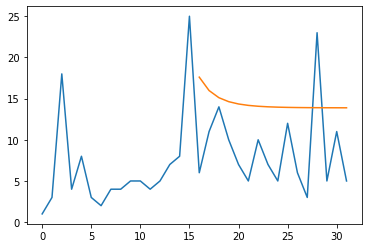

In [114]:
#plt.plot(range(16), x[0, :, 0, 0])
#plt.plot(range(16, 32), y_modif[:, 0])
plt.plot(all[0, :, 0, 0])
plt.plot(range(16, 32), pred.detach().numpy()[:, 0])

In [118]:
pred = pred.reshape(pred.shape[0], -1, 37)

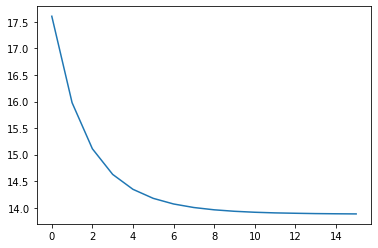

In [120]:
plt.plot(pred.detach().numpy()[:, 0, 0])

In [ ]:
(2, 32, 37, 1)

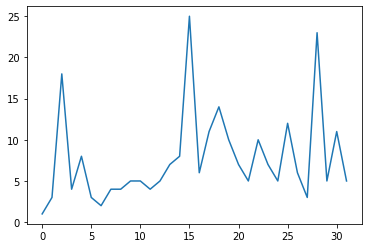

In [113]:
plt.plot(all[0, :, 0, 0])

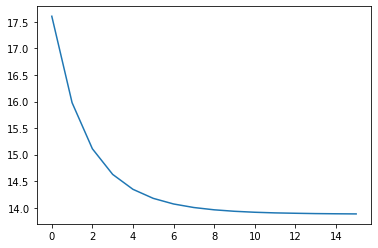

In [105]:
plt.plot(pred.detach().numpy()[:, 0])

In [26]:
import pickle
with open(rf"C:\Users\Bened\PycharmProjects\madrid-traffic\training_history\{training_datetime}\losses\train.pkl", "rb") as f:
    train = pickle.load(f)
train

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Bened\\PycharmProjects\\madrid-traffic\\training_history\\20220609_202835\\losses\\train.pkl'

In [ ]:
import pickle
with open(fr"C:\Users\Bened\PycharmProjects\madrid-traffic\training_history\{training_datetime}\losses\test.pkl", "rb") as f:
    test = pickle.load(f)
test